In [1]:
import matplotlib.pyplot as plt
import numpy as np
import Code.utils as utils
import Code.environment.settings as settings
from Code.MC_simulator import Simulator
from Code.environment.Environment import Environment
from Code.environment.Customer import Customer
%matplotlib inline

This notebook is used to find which is the number of
simulations such that the estimation of the reward can be considered
acceptable

In [2]:
cust_json = "customer_classes.json"
today_customer = 500
var_cust = 10
p_lambda = 0.5
graph_json = "business_full_graph.json"
arms = settings.prices
customer = Customer(0, 0)
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
sim = Simulator([customer], environment.products_graph, [1])

In [3]:
N_TRIES = 5
END = 200
START = 1
arm = [1, 3, 2, 1, 0]
prices = [arms[p][a] for p, a in enumerate(arm)]
mu_s = []
std_s = []
finish = START + END
tot_iter = finish * (finish - 1) / 2
for t in range(START, END + START):
    if t % 3:
        iter_completed = t * (t - 1) / 2
        utils.progress_bar(iter_completed, tot_iter)
    rewards = []
    for i in range(N_TRIES):
        report = sim.run(t, arm)
        rewards.append(report.expected_reward(prices))
    mu_s.append(np.mean(rewards))
    std_s.append(np.std(rewards))

loading: [==============================] 99.0%

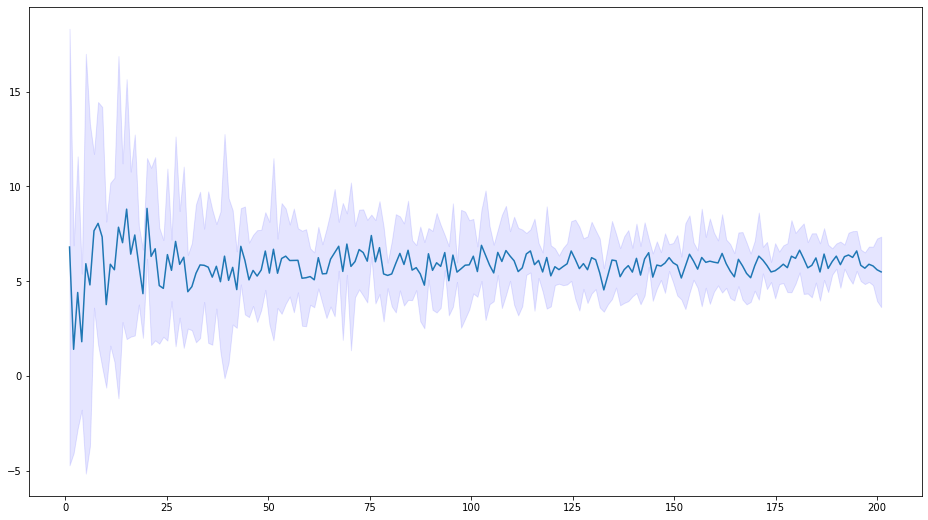

In [4]:
std_s = np.array(std_s)
mu_s = np.array(mu_s)

quantile = 1.96
mu = np.array(mu_s)
x = np.linspace(START, START + END, END)
plt.figure(figsize=(16, 9))
plt.plot(x, mu_s)
plt.fill_between(x,
                 (mu_s + quantile * std_s),
                 (mu_s - quantile * std_s),
                 color="blue",
                 alpha=0.1)
plt.show()